In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.model_selection  import train_test_split
from sklearn.preprocessing import MinMaxScaler
import math
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix  
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import roc_curve, plot_roc_curve

In [2]:
#uploading merged with plane data set which was already done in question 2

In [3]:
mergedwithplanedata=pd.read_csv(r"C:\Users\DELL\Desktop\Coursework\coursework data set\mergedwithplanedata.csv")

C:\Users\DELL\AppData\Local\Temp\ipykernel_16764\1071134838.py:1: DtypeWarning: Columns (29,30,31,32,33,34,35,36) have mixed types. Specify dtype option on import or set low_memory=False.
  mergedwithplanedata=pd.read_csv(r"C:\Users\DELL\Desktop\Coursework\coursework data set\mergedwithplanedata.csv")


In [4]:
mergedwithplanedata.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,SecurityDelay,LateAircraftDelay,type,manufacturer,issue_date,model,status,aircraft_type,engine_type,year
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,0,0,Corporation,AIRBUS INDUSTRIE,07/09/2004,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1999
1,2006,1,11,3,1053.0,1053,1313.0,1318,US,613,...,0,0,Corporation,AIRBUS,10/04/2004,A319-132,Valid,Fixed Wing Multi-Engine,Turbo-Fan,None
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,0,0,Corporation,AIRBUS INDUSTRIE,01/25/2000,A320-232,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1997
3,2006,1,11,3,1753.0,1755,1925.0,1933,US,300,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,0,0,Corporation,BOEING,09/28/2005,737-3G7,Valid,Fixed Wing Multi-Engine,Turbo-Jet,1990


In [5]:
#changing 'year' to 'yearofmanufacture'

In [6]:
mergedwithplanedata = mergedwithplanedata.rename(columns={"year": "YearOfManufacture"})

In [7]:
#checking the columns

In [8]:
mergedwithplanedata.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay',
       'type', 'manufacturer', 'issue_date', 'model', 'status',
       'aircraft_type', 'engine_type', 'YearOfManufacture'],
      dtype='object')

In [9]:
#checking for null values

In [10]:
pd.isnull(mergedwithplanedata).sum(axis=0)

Year                        0
Month                       0
DayofMonth                  0
DayOfWeek                   0
DepTime                282682
CRSDepTime                  0
ArrTime                316046
CRSArrTime                  0
UniqueCarrier               0
FlightNum                   0
TailNum                    22
ActualElapsedTime      316046
CRSElapsedTime            998
AirTime                316046
ArrDelay               316046
DepDelay               282682
Origin                      0
Dest                        0
Distance                    0
TaxiIn                      0
TaxiOut                     0
Cancelled                   0
CancellationCode     14312420
Diverted                    0
CarrierDelay                0
WeatherDelay                0
NASDelay                    0
SecurityDelay               0
LateAircraftDelay           0
type                  2564554
manufacturer          2564554
issue_date            2564554
model                 2564554
status    

In [11]:
#dropping columns

In [12]:
q5data = mergedwithplanedata.drop(columns=["CancellationCode","type","manufacturer","issue_date","model","status","aircraft_type","engine_type"])

In [13]:
# making rows with '0000' values in "year of manufacture" column null values

In [14]:
q5data.loc[q5data['YearOfManufacture'] == '0000', 'YearOfManufacture'] = np.nan

In [15]:
q5data.loc[q5data['YearOfManufacture'] == 'None', 'YearOfManufacture'] = np.nan

In [16]:
#checking for null values and dropping

In [17]:
pd.isnull(q5data).sum(axis=0)

Year                       0
Month                      0
DayofMonth                 0
DayOfWeek                  0
DepTime               282682
CRSDepTime                 0
ArrTime               316046
CRSArrTime                 0
UniqueCarrier              0
FlightNum                  0
TailNum                   22
ActualElapsedTime     316046
CRSElapsedTime           998
AirTime               316046
ArrDelay              316046
DepDelay              282682
Origin                     0
Dest                       0
Distance                   0
TaxiIn                     0
TaxiOut                    0
Cancelled                  0
Diverted                   0
CarrierDelay               0
WeatherDelay               0
NASDelay                   0
SecurityDelay              0
LateAircraftDelay          0
YearOfManufacture    2931046
dtype: int64

In [18]:
q5data = q5data.dropna()
q5data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,YearOfManufacture
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,45,13,0,0,0,0,0,0,0,1999
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,4,11,0,0,0,0,0,0,0,1997
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,27,12,0,0,0,0,0,0,0,1990
5,2006,1,11,3,627.0,630,834.0,832,US,295,...,6,13,0,0,0,0,0,0,0,2000
7,2006,1,11,3,942.0,945,1155.0,1148,US,356,...,4,8,0,0,0,0,0,0,0,1989


In [19]:
pd.isnull(q5data).sum(axis=0)

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
YearOfManufacture    0
dtype: int64

In [20]:
# change the data type of year of manufacture column from object to integer

In [21]:
q5data.loc[:, 'YearOfManufacture'] = q5data['YearOfManufacture'].astype(int)

In [22]:
#calculating plane age 

In [23]:
q5data.loc[:, 'PlaneAge'] = q5data['Year'] - q5data['YearOfManufacture']
q5data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,YearOfManufacture,PlaneAge
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,13,0,0,0,0,0,0,0,1999,7
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,11,0,0,0,0,0,0,0,1997,9
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,12,0,0,0,0,0,0,0,1990,16
5,2006,1,11,3,627.0,630,834.0,832,US,295,...,13,0,0,0,0,0,0,0,2000,6
7,2006,1,11,3,942.0,945,1155.0,1148,US,356,...,8,0,0,0,0,0,0,0,1989,17


In [24]:
#making plane age = -1 a null value

In [25]:
q5data.loc[q5data['PlaneAge'] == -1 , 'PlaneAge'] = np.nan

In [26]:
#checking for null values and dropping them

In [27]:
pd.isnull(q5data).sum(axis=0)

Year                    0
Month                   0
DayofMonth              0
DayOfWeek               0
DepTime                 0
CRSDepTime              0
ArrTime                 0
CRSArrTime              0
UniqueCarrier           0
FlightNum               0
TailNum                 0
ActualElapsedTime       0
CRSElapsedTime          0
AirTime                 0
ArrDelay                0
DepDelay                0
Origin                  0
Dest                    0
Distance                0
TaxiIn                  0
TaxiOut                 0
Cancelled               0
Diverted                0
CarrierDelay            0
WeatherDelay            0
NASDelay                0
SecurityDelay           0
LateAircraftDelay       0
YearOfManufacture       0
PlaneAge             1812
dtype: int64

In [28]:
q5data = q5data.dropna()
q5data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,YearOfManufacture,PlaneAge
0,2006,1,11,3,743.0,745,1024.0,1018,US,343,...,13,0,0,0,0,0,0,0,1999,7.0
2,2006,1,11,3,1915.0,1915,2110.0,2133,US,617,...,11,0,0,0,0,0,0,0,1997,9.0
4,2006,1,11,3,824.0,832,1015.0,1015,US,765,...,12,0,0,0,0,0,0,0,1990,16.0
5,2006,1,11,3,627.0,630,834.0,832,US,295,...,13,0,0,0,0,0,0,0,2000,6.0
7,2006,1,11,3,942.0,945,1155.0,1148,US,356,...,8,0,0,0,0,0,0,0,1989,17.0


In [29]:
pd.isnull(q5data).sum(axis=0)

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              0
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
YearOfManufacture    0
PlaneAge             0
dtype: int64

In [30]:
#dropping columns

In [31]:
q5data = q5data.drop(columns=["Cancelled","Diverted","YearOfManufacture"])

<AxesSubplot:>

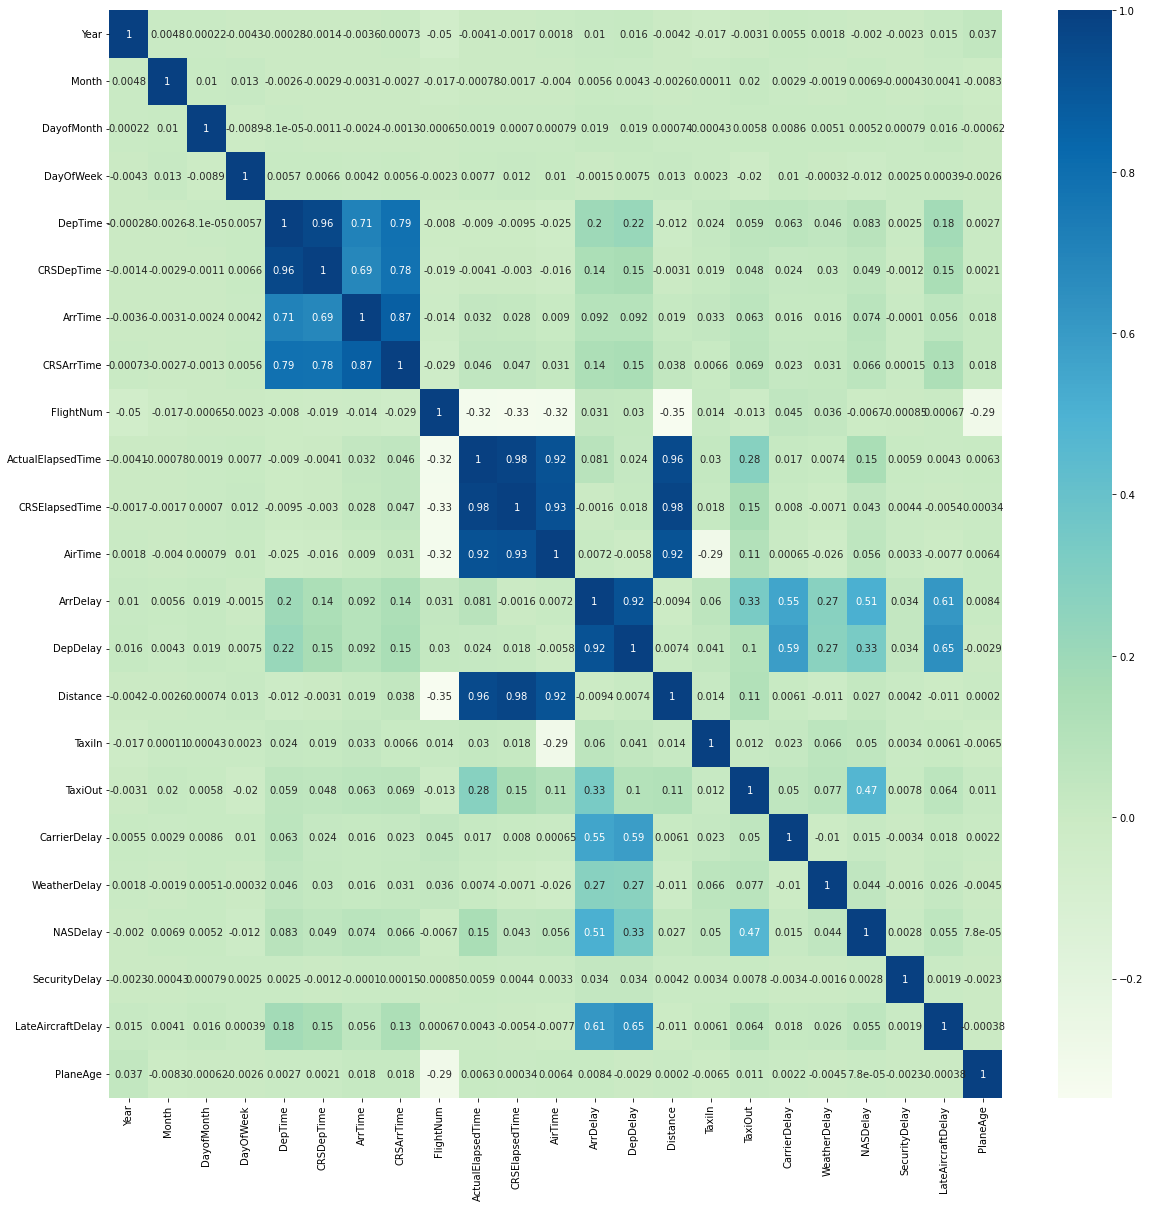

In [32]:
#correlation plot
plt.figure(figsize=(20,20))
correlation = q5data.corr()
sns.heatmap(correlation,cmap='GnBu',annot=True)

### Cleaning Data For Modelling on Arrival Delays

In [33]:
# Extracting the desired columns 

In [34]:
q5arrdataset=mergedwithplanedata[["Year","Month","DayOfWeek","DepDelay","ArrDelay","Distance","YearOfManufacture"]]
q5arrdataset.head()

,Year,Month,DayOfWeek,DepDelay,ArrDelay,Distance,YearOfManufacture
0,2006,1,3,-2.0,6.0,1587,1999
1,2006,1,3,0.0,-5.0,1587,None
2,2006,1,3,0.0,-23.0,1587,1997
3,2006,1,3,-2.0,-8.0,872,NaN
4,2006,1,3,-8.0,0.0,872,1990


In [35]:
#checking for null values

In [36]:
pd.isnull(q5arrdataset).sum(axis=0)

Year                       0
Month                      0
DayOfWeek                  0
DepDelay              282682
ArrDelay              316046
Distance                   0
YearOfManufacture    2564554
dtype: int64

In [37]:
# making rows with '0000' values in "year of manufacture" column null values

In [38]:
q5arrdataset.loc[q5arrdataset['YearOfManufacture'] == '0000', 'YearOfManufacture'] = np.nan

In [39]:
q5arrdataset.loc[q5arrdataset['YearOfManufacture'] == 'None', 'YearOfManufacture'] = np.nan

In [40]:
#checking for null values and dropping

In [41]:
pd.isnull(q5arrdataset).sum(axis=0)

Year                       0
Month                      0
DayOfWeek                  0
DepDelay              282682
ArrDelay              316046
Distance                   0
YearOfManufacture    2931046
dtype: int64

In [42]:
q5arrdataset= q5arrdataset.dropna()
q5arrdataset.head()

,Year,Month,DayOfWeek,DepDelay,ArrDelay,Distance,YearOfManufacture
0,2006,1,3,-2.0,6.0,1587,1999
2,2006,1,3,0.0,-23.0,1587,1997
4,2006,1,3,-8.0,0.0,872,1990
5,2006,1,3,-3.0,2.0,644,2000
7,2006,1,3,-3.0,7.0,644,1989


In [43]:
pd.isnull(q5arrdataset).sum(axis=0)

Year                 0
Month                0
DayOfWeek            0
DepDelay             0
ArrDelay             0
Distance             0
YearOfManufacture    0
dtype: int64

In [44]:
# change the data type of year of manufacture column from object to integer

In [45]:
q5arrdataset.loc[:, 'YearOfManufacture'] = q5arrdataset['YearOfManufacture'].astype(int)

In [46]:
#calculating plane age 

In [47]:
q5arrdataset.loc[:, 'PlaneAge'] = q5arrdataset['Year'] -q5arrdataset['YearOfManufacture']
q5arrdataset.head()

,Year,Month,DayOfWeek,DepDelay,ArrDelay,Distance,YearOfManufacture,PlaneAge
0,2006,1,3,-2.0,6.0,1587,1999,7
2,2006,1,3,0.0,-23.0,1587,1997,9
4,2006,1,3,-8.0,0.0,872,1990,16
5,2006,1,3,-3.0,2.0,644,2000,6
7,2006,1,3,-3.0,7.0,644,1989,17


In [48]:
#making plane age = -1 a null value

In [49]:
q5arrdataset.loc[q5arrdataset['PlaneAge'] == -1 , 'PlaneAge'] = np.nan

In [50]:
#checking for null values and dropping them

In [51]:
pd.isnull(q5arrdataset).sum(axis=0)

Year                    0
Month                   0
DayOfWeek               0
DepDelay                0
ArrDelay                0
Distance                0
YearOfManufacture       0
PlaneAge             1812
dtype: int64

In [52]:
q5arrdataset= q5arrdataset.dropna()
q5arrdataset.head()

,Year,Month,DayOfWeek,DepDelay,ArrDelay,Distance,YearOfManufacture,PlaneAge
0,2006,1,3,-2.0,6.0,1587,1999,7.0
2,2006,1,3,0.0,-23.0,1587,1997,9.0
4,2006,1,3,-8.0,0.0,872,1990,16.0
5,2006,1,3,-3.0,2.0,644,2000,6.0
7,2006,1,3,-3.0,7.0,644,1989,17.0


In [53]:
pd.isnull(q5arrdataset).sum(axis=0)

Year                 0
Month                0
DayOfWeek            0
DepDelay             0
ArrDelay             0
Distance             0
YearOfManufacture    0
PlaneAge             0
dtype: int64

In [54]:
#dropping columns

In [55]:
q5arrdataset = q5arrdataset.drop(columns=["Year","YearOfManufacture"])
q5arrdataset.head()

,Month,DayOfWeek,DepDelay,ArrDelay,Distance,PlaneAge
0,1,3,-2.0,6.0,1587,7.0
2,1,3,0.0,-23.0,1587,9.0
4,1,3,-8.0,0.0,872,16.0
5,1,3,-3.0,2.0,644,6.0
7,1,3,-3.0,7.0,644,17.0


In [56]:
q5arrdataset['DelayStatus'] = q5arrdataset['ArrDelay'].apply(lambda x: 1 if x > 0 else 0)
q5arrdataset.head()

,Month,DayOfWeek,DepDelay,ArrDelay,Distance,PlaneAge,DelayStatus
0,1,3,-2.0,6.0,1587,7.0,1
2,1,3,0.0,-23.0,1587,9.0,0
4,1,3,-8.0,0.0,872,16.0,0
5,1,3,-3.0,2.0,644,6.0,1
7,1,3,-3.0,7.0,644,17.0,1


In [57]:
#saving the cleaned data set in question 5 to again upload for linear regression modelling since u get memory error

In [58]:
q5arrdataset.to_csv(r"C:\Users\DELL\Desktop\Coursework\coursework data set\question5cleaneddata.csv",index=False)

## Supervised Classification

In [59]:
#dropping ArrDelay Column as we are modelling for it

In [60]:
q5classif= q5arrdataset.drop(columns=["ArrDelay"])
q5classif.shape

(11564843, 6)

In [61]:
#checking if Delay Status is balanced

In [62]:
q5classif['DelayStatus'].value_counts()

0    6115514
1    5449329
Name: DelayStatus, dtype: int64

In [63]:
6115514/11564843

0.5288021635918447

In [64]:
5449329/11564843

0.4711978364081553

In [65]:
#gives a 52% and 48% respectively showing its approximaely balanced and is not biased

In [66]:
#standardising the variables except for categorical data

In [67]:
q5num = q5classif.copy()
scaler = StandardScaler()
num_cols = ['DepDelay', 'Distance', 'PlaneAge']
q5num[num_cols] = scaler.fit_transform(q5classif[num_cols])
q5num.head()

,Month,DayOfWeek,DepDelay,Distance,PlaneAge,DelayStatus
0,1,3,-0.366732,1.517625,-0.360329,1
2,1,3,-0.309292,1.517625,-0.086121,0
4,1,3,-0.539054,0.258009,0.873606,0
5,1,3,-0.395452,-0.143658,-0.497433,1
7,1,3,-0.395452,-0.143658,1.010710,1


In [68]:
# Using indicator function for categorical variables and encode using OneHotEncoder
encoder = OneHotEncoder(sparse=False)
cat_cols = ['Month', 'DayOfWeek']
q5categorical = q5classif[cat_cols]
q5categorical = pd.DataFrame(encoder.fit_transform(q5categorical), columns=encoder.get_feature_names(cat_cols), index=q5num.index)
q5categorical.head()


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [69]:
q5classif_new = pd.merge(q5num, q5categorical, left_index=True, right_index=True, how='left')
print('Shape of dataframe:',q5classif_new.shape)
q5classif_new= q5classif_new.drop(columns=["Month","DayOfWeek"])
q5classif_new.head()

Shape of dataframe: (11564843, 25)


,DepDelay,Distance,PlaneAge,DelayStatus,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,...,Month_10,Month_11,Month_12,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,-0.366732,1.517625,-0.360329,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-0.309292,1.517625,-0.086121,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-0.539054,0.258009,0.873606,0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,-0.395452,-0.143658,-0.497433,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,-0.395452,-0.143658,1.010710,1,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [70]:
#dropping delay status column to predict it

In [71]:
q5classiftest= q5classif_new.drop(columns=["DelayStatus"])
q5classiftest.shape

(11564843, 22)

In [72]:
#predicting 

In [73]:
y=np.array(q5classif_new['DelayStatus'])

In [74]:
#data preperation Train,Test,Split

In [75]:
X_train, X_test, y_train, y_test = train_test_split(q5classiftest, y, test_size=0.3, random_state=0)

### Decision Tree

In [76]:
decisiontreemodel= DecisionTreeClassifier(criterion='entropy', random_state=0)  
decisiontreemodel.fit(X_train, y_train)  

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [77]:
y_preddt= decisiontreemodel.predict(X_test)  

In [78]:
#test accuracy

In [79]:
cmdt= confusion_matrix(y_test, y_preddt)
cmdt

array([[1391954,  443310],
       [ 548628, 1085561]], dtype=int64)

In [80]:
# Calculate accuracy
accuracydt= (cmdt[0,0] + cmdt[1,1]) / sum(sum(cmdt))
# Convert to percentage
accuracy_percentdt = accuracydt * 100
print("Accuracy: {:.2f}%".format(accuracy_percentdt))

Accuracy: 71.41%


In [81]:
# Calculate F1 score
from sklearn.metrics import f1_score
threshold_value = 0.5
y_preddt_binary = (y_preddt > threshold_value).astype(int)
f1_scoredt = f1_score(y_test, y_preddt_binary)
print("F1 score: ", f1_scoredt)

F1 score:  0.6863992462994694


### Logistic Regression

In [82]:
logisticregressionmodel = LogisticRegression(random_state=16)
logisticregressionmodel.fit(X_train, y_train)

LogisticRegression(random_state=16)

In [83]:
y_predlr = logisticregressionmodel.predict(X_test)

In [84]:
#test accuracy

In [85]:
#create the confusion matrix
cmlr = metrics.confusion_matrix(y_test, y_predlr)
cmlr

array([[1669312,  165952],
       [ 601204, 1032985]], dtype=int64)

In [86]:
# Calculate accuracy
accuracylr= (cmlr[0,0] + cmlr[1,1]) / sum(sum(cmlr))

# Convert to percentage
accuracy_percentlr = accuracylr * 100

print("Accuracy: {:.2f}%".format(accuracy_percentlr))

Accuracy: 77.89%


In [87]:
# Calculate F1 score
threshold_value = 0.5
y_predlr_binary = (y_predlr > threshold_value).astype(int)
f1_scorelr = f1_score(y_test, y_predlr_binary)
print("F1 score: ", f1_scorelr)

F1 score:  0.7292192440435054


C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metric.RocCurveDisplay.from_predictions` or :meth:`sklearn.metric.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


<Figure size 576x432 with 0 Axes>

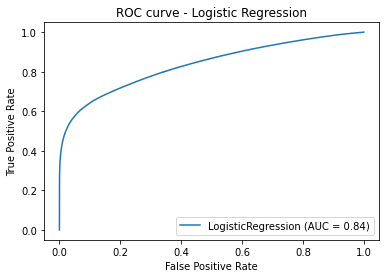

In [88]:
# Get predicted probabilities for positive class
y_proba_lr = logisticregressionmodel.predict_proba(X_test)[:, 1]

# Calculate false positive rate, true positive rate, and thresholds
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_proba_lr)

# Plotting ROC curve
plt.figure(figsize=(8, 6))
plot_roc_curve(logisticregressionmodel, X_test, y_test)
plt.title('ROC curve - Logistic Regression')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

### Random Forest

In [89]:
randomforestmodel = RandomForestClassifier()
randomforestmodel.fit(X_train, y_train)

RandomForestClassifier()

In [90]:
y_predrf = randomforestmodel.predict(X_test)

In [91]:
#test accuracy

In [92]:
# Create the confusion matrix
cmrf = confusion_matrix(y_test, y_predrf)
cmrf

array([[1398290,  436974],
       [ 516326, 1117863]], dtype=int64)

In [93]:
# Calculate accuracy
accuracyrf= (cmrf[0,0] + cmrf[1,1]) / sum(sum(cmrf))

# Convert to percentage
accuracy_percentrf = accuracyrf * 100

print("Accuracy: {:.2f}%".format(accuracy_percentrf))

Accuracy: 72.52%


In [94]:
# Calculate F1 score
threshold_value = 0.5
y_predrf_binary = (y_predrf > threshold_value).astype(int)
f1_scorerf = f1_score(y_test, y_predrf_binary)
print("F1 score: ", f1_scorerf)

F1 score:  0.7010686021374551


In [95]:
print("Decision Tree")
cmdt
print("Accuracy: {:.2f}%".format(accuracy_percentdt))
print("F1 score: ", f1_scoredt)
print("Logistic Regression")
cmlr
print("Accuracy: {:.2f}%".format(accuracy_percentlr))
print("F1 score: ", f1_scorelr)
print("Random Forest")
cmrf
print("Accuracy: {:.2f}%".format(accuracy_percentrf))
print("F1 score: ", f1_scorerf)

Decision Tree
Accuracy: 71.41%
F1 score:  0.6863992462994694
Logistic Regression
Accuracy: 77.89%
F1 score:  0.7292192440435054
Random Forest
Accuracy: 72.52%
F1 score:  0.7010686021374551


In [96]:
#for the below model,libraries and the cleaned data set have been uploaded again to include all question 5 in 1 jupyter notebook
#since RAM is low which gives memory error if high performance device is used to run the code no need to run those line of code.

## Linear Regression Model

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.api.types import is_string_dtype, is_numeric_dtype
from sklearn.model_selection  import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
import math
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

In [2]:
#uploading cleaned data set

In [3]:
q5arrdataset=pd.read_csv(r"C:\Users\DELL\Desktop\Coursework\coursework data set\question5cleaneddata.csv")

In [4]:
#dropping Delay Status Column 

In [5]:
q5regression= q5arrdataset.drop(columns=["DelayStatus"])
q5regression.shape

(11564843, 6)

In [6]:
#standardising the variables except for categorical data

In [7]:
q5numreg = q5regression.copy()
num_cols = ['DepDelay', 'Distance', 'PlaneAge','ArrDelay']
q5numreg.head()

,Month,DayOfWeek,DepDelay,ArrDelay,Distance,PlaneAge
0,1,3,-2.0,6.0,1587,7.0
1,1,3,0.0,-23.0,1587,9.0
2,1,3,-8.0,0.0,872,16.0
3,1,3,-3.0,2.0,644,6.0
4,1,3,-3.0,7.0,644,17.0


In [8]:
# Convert categorical variables to indicator variables and encode using OneHotEncoder
encoder = OneHotEncoder(sparse=False)
cat_cols = ['Month', 'DayOfWeek']
q5categoricalreg = q5regression[cat_cols]
q5categoricalreg = pd.DataFrame(encoder.fit_transform(q5categoricalreg), columns=encoder.get_feature_names(cat_cols), index=q5numreg.index)
q5categoricalreg.head()

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,Month_8,Month_9,Month_10,Month_11,Month_12,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [9]:
q5regression_new = pd.merge(q5numreg, q5categoricalreg, left_index=True, right_index=True, how='left')
q5regression_new= q5regression_new.drop(columns=["Month","DayOfWeek"])
print('Shape of dataframe:',q5regression_new.shape)
q5regression_new.head()

Shape of dataframe: (11564843, 23)


,DepDelay,ArrDelay,Distance,PlaneAge,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,...,Month_10,Month_11,Month_12,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,-2.0,6.0,1587,7.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,-23.0,1587,9.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-8.0,0.0,872,16.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-3.0,2.0,644,6.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-3.0,7.0,644,17.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [10]:
#dropping Arrival Delay column to predict it

In [11]:
q5regressiontest= q5regression_new.drop(columns=["ArrDelay"])
q5regressiontest.shape
q5regressiontest.head()

,DepDelay,Distance,PlaneAge,Month_1,Month_2,Month_3,Month_4,Month_5,Month_6,Month_7,...,Month_10,Month_11,Month_12,DayOfWeek_1,DayOfWeek_2,DayOfWeek_3,DayOfWeek_4,DayOfWeek_5,DayOfWeek_6,DayOfWeek_7
0,-2.0,1587,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,1587,9.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,-8.0,872,16.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,-3.0,644,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,-3.0,644,17.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [12]:
#predicting 

In [13]:
y=np.array(q5regression_new['ArrDelay'])

In [14]:
#data preperation Train,Test,Split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(q5regressiontest, y, test_size=0.3, random_state=0)

In [16]:
regressionmodel = LinearRegression(n_jobs=-1)

In [17]:
model=regressionmodel.fit(X_train, y_train)

In [18]:
r_sq = model.score(X_train, y_train)
r_sq

0.8563129453848972

In [19]:
model.score(X_test,y_test)

0.8539055391061231

Text(0.5, 1.0, 'Actual Values vs Predicted Values')

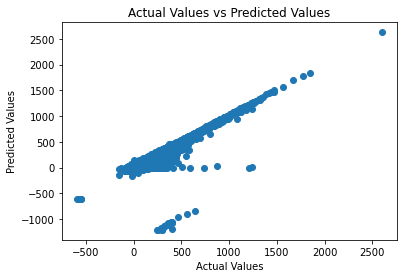

In [20]:
predictions=model.predict(X_test)
plt.scatter(y_test,predictions)
x = plt.xlabel('Actual Values')
y = plt.ylabel('Predicted Values')
plt.title('Actual Values vs Predicted Values')

In [21]:
#residual error diagnosis

In [22]:
residuals=y_test-predictions

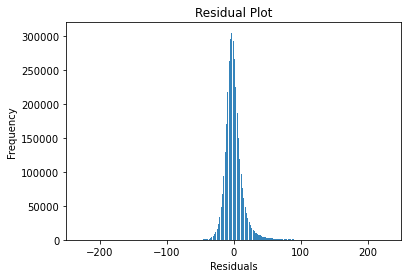

In [23]:
plt.hist(residuals, bins=range(-250, 260, 2), alpha=0.9, rwidth=0.85)
plt.xlim([-250, 250])
plt.title('Residual Plot')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

In [24]:
print(f"intercept:{model.intercept_}")

intercept:-0.9737296792308321


In [25]:
print(f"coefficients:{model.coef_}")

coefficients:[ 1.01032082e+00 -1.08273875e-03  5.74597211e-02 -9.33681957e-02
  2.00140260e-01 -4.94393603e-01 -4.07770540e-01 -2.76554535e-01
  7.29605521e-01  2.14745120e-01  8.92018471e-02 -9.50420713e-02
  6.21150059e-01 -9.29714363e-01  4.42000502e-01 -1.08575993e-01
  5.33732748e-02  5.59633705e-01  1.15787974e+00  6.71101257e-01
 -1.79862676e+00 -5.34785228e-01]
